In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\anaconda\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "d:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "d:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\anaconda\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "d:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "d:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop

AttributeError: _ARRAY_API not found

In [2]:
df=pd.read_csv('DM2425_ABCDEats_DATASET.csv',delimiter=',')

# Drop Dublicates

We need to eliminate duplicates to prevent further issues, especially with the index setting

In [3]:
df.duplicated().sum()

np.int64(13)

In [4]:
df=df.drop_duplicates()
# Count the number of remaining duplicate rows in the DataFrame after dropping duplicates
df.duplicated().sum()

np.int64(0)

# Set costumer_id as the index

In [5]:
df.set_index('customer_id', inplace=True)

## Fixing variables

**customer_age**

Fill missing values with median

In [6]:
df['customer_age'].isna().sum()

np.int64(727)

In [7]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())
df['customer_age'].isna().sum()

np.int64(0)

**costumer_region**

Replace the value of '-' with 'Unknown' to enhance the interpretation of the feature

In [8]:
df.loc[:, 'customer_region'] = df['customer_region'].replace('8550', '-')

In [9]:
df.loc[:, 'customer_region'] = df['customer_region'].replace('-', np.nan)

In [10]:
mode_value = df['customer_region'].mode()[0]
df['customer_region'] = df['customer_region'].fillna(mode_value)

In [11]:
df['customer_region'].value_counts()

customer_region
8670    10216
4660     9550
2360     8829
2440     1483
4140      857
8370      495
2490      445
Name: count, dtype: int64

**product_count**

There is an extreme product count value with '92ced2dcb9' index, so we will transform it into a high value

In [12]:
df.loc['92ced2dcb9','product_count']=100

**first_order**

Fill missing values with median

In [13]:
df['first_order'] = df['first_order'].fillna(df['first_order'].median())

**last_promo**

Replace the value of '-' with 'no_promotion_used' to enhance the interpretation of the feature

In [14]:
df['last_promo'] = df['last_promo'].replace('-', 'no_promotion_used')

**HR_0**

Drop the column labeled "HR_0" because it contains only zeros.

In [15]:
df.drop(columns=['HR_0'], inplace=True)

#Fixing inconsistencies

Eliminate rows where there are inconsistencies

In [16]:
df['sum_HR']=df['HR_1']+df['HR_2']+df['HR_3']+df['HR_4']+df['HR_5']+df['HR_6']+df['HR_7']+df['HR_8']+df['HR_9']+df['HR_10']+df['HR_11']+df['HR_12']+df['HR_13']+df['HR_14']+df['HR_15']+df['HR_16']+df['HR_17']+df['HR_18']+df['HR_19']+df['HR_20']+df['HR_21']+df['HR_22']+df['HR_23']
df['sum_DOW']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']
df['inc_0']=(df['sum_HR']!=df['sum_DOW'])
df['inc_2']=(df['product_count']==0)
df = df.loc[~(df['inc_0'] | df['inc_2'])]
df = df.drop(columns=['sum_HR', 'sum_DOW', 'inc_0', 'inc_2'])

# New variables

**Total_Spent**

In [17]:
cuisine = [col for col in df.columns if col.startswith('CUI_')]

In [18]:
df['Total_Spent']=df[cuisine].sum(axis=1)

Deal with extreme outliers

In [19]:
df = df.drop('92ced2dcb9', axis=0)
df.loc['249ba584d3','CUI_Asian']=500
df.loc['8d65421423','CUI_Japanese']=590
df['Total_Spent']=df[cuisine].sum(axis=1)

**Order_Count**

In [20]:
df['order_count']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']

**Diversity_Cuisine**

In [21]:
df['Diversity_Cuisine'] = (df[cuisine] > 0).sum(axis=1)
df['Diversity_Cuisine'] = df['order_count']/df['Diversity_Cuisine']

**Costumer_time**

In [22]:
df['costumer_time']=df['last_order']-df['first_order']

**Intensity_of_Activity**

In [23]:
df['Intensity_of_Activity'] = df['costumer_time'] / df['order_count']

**Customer_Loyalty**

In [24]:
df['Customer_loyalty'] = df['vendor_count'] / df['order_count']

**Product_Intensity**

In [25]:
df['product_intensity'] = df['product_count'] / df['order_count']

**Day_Week_Spread**

In [26]:
days = [col for col in df.columns if col.startswith('DOW_')]

In [27]:
df['Day_Week_Spread'] = df.loc[:,days].var(axis=1)

**hour_spread**

In [28]:
hours=[col for col in df.columns if col.startswith('HR_')]

In [29]:
df['hour_spread'] = df.loc[:,hours].var(axis=1)

In [30]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Spent', 'order_count',
       'Diversity_Cuisine', 'costumer_time', 'Intensity_of_Activity',
       'Customer_loyalty', 'product_intensity', 'Day_Week_Spread',
       'hour_spread'],
      dtype='object')

# Normalize data

In [31]:
#Select numeric features
metric_features = df.select_dtypes(include=['number']).columns.tolist()

In [32]:
# Normalize numeric data with Min-Max scaler
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df[metric_features])
df[metric_features] = scaled_feat

# Separate data by  demographic,psychographic and behaviour-based segmentation

In [33]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Spent', 'order_count',
       'Diversity_Cuisine', 'costumer_time', 'Intensity_of_Activity',
       'Customer_loyalty', 'product_intensity', 'Day_Week_Spread',
       'hour_spread'],
      dtype='object')

In [34]:
df.drop('customer_region',axis=1,inplace=True)
df.drop('payment_method',axis=1,inplace=True)
df.drop('last_promo',axis=1,inplace=True)


In [35]:
df_demo=df['customer_age']

In [36]:
df = df.drop('customer_age', axis=1)

In [37]:
cuisine_columns=[col for col in df.columns if col.startswith('CUI')]

In [38]:
df_psy=df[cuisine_columns]

In [39]:
df.drop(cuisine_columns,axis=1,inplace=True)

In [40]:
df_behavi=df.copy()

# PCA analisys psychographic segmentation

In [41]:
pca = PCA().fit(df_psy)

In [42]:
PCA_s=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
PCA_s.head(20)

,Eigenvalue,Difference,Proportion,Cumulative
1,0.001935,0.000000,0.169510,0.169510
2,0.001672,-0.000263,0.146510,0.316020
3,0.001310,-0.000362,0.114816,0.430836
4,0.001254,-0.000056,0.109882,0.540718
5,0.001082,-0.000172,0.094807,0.635525
6,0.000714,-0.000369,0.062514,0.698039
7,0.000569,-0.000145,0.049844,0.747883
8,0.000553,-0.000016,0.048415,0.796298
9,0.000513,-0.000040,0.044922,0.841220
10,0.000476,-0.000037,0.041717,0.882937


In [43]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_psy.columns)
print(loadings)

                               PC1       PC2       PC3       PC4       PC5  \
CUI_American              0.437491  0.836006  0.101510  0.171789 -0.227643   
CUI_Asian                 0.697184 -0.182693 -0.452639 -0.512606  0.059351   
CUI_Beverages             0.208897 -0.189561 -0.497612  0.810293  0.074062   
CUI_Cafe                  0.011127  0.085022 -0.007428 -0.009926  0.103758   
CUI_Chicken Dishes       -0.026392  0.017320 -0.011902  0.017425  0.057071   
CUI_Chinese               0.006611  0.003435 -0.019056  0.010352  0.021889   
CUI_Desserts              0.084087 -0.041656 -0.008958  0.037564 -0.007314   
CUI_Healthy               0.020305  0.020618 -0.021976 -0.013095  0.070504   
CUI_Indian               -0.028881  0.073464 -0.010317 -0.025291  0.117862   
CUI_Italian              -0.035422  0.139572  0.034362 -0.027219  0.082847   
CUI_Japanese              0.035974  0.021608 -0.011728 -0.018487  0.041476   
CUI_Noodle Dishes        -0.021521  0.000631 -0.012879  0.019757

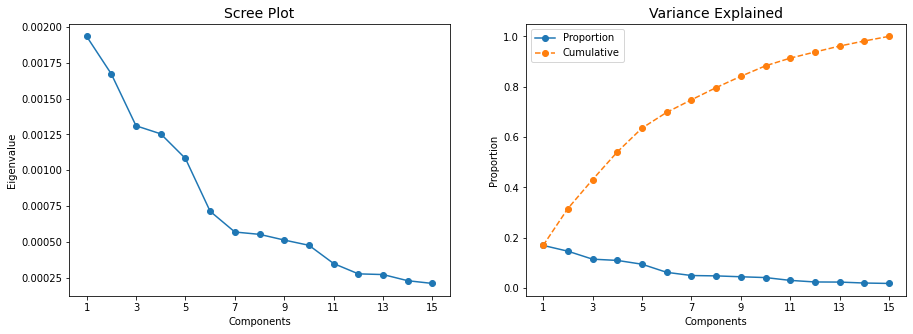

In [44]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

We decided to establish a threshold of 85% cumulative variance, so we will retain the first 10 components

In [45]:
#Retain the first 8 components
pca = PCA(n_components=10)
pca_feat = pca.fit_transform(df_psy)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
#Create the dataframe "df_PCA" with the PC`s and the normalized categorical features
df_PCA = pd.DataFrame(pca_feat, index=df_psy.index, columns=pca_feat_names)
#Normalize the PC features
metric_features1 = df_PCA.select_dtypes(include=['number']).columns.tolist()
scaled_feat = scaler.fit_transform(df_PCA)
df_PCA = scaled_feat
df_psy = pd.DataFrame(df_PCA, index=df_psy.index, columns=metric_features1)

# PCA Behavioral segmentation

In [46]:
pca = PCA().fit(df_behavi)

In [47]:
PCA_s=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
PCA_s.head(20)

,Eigenvalue,Difference,Proportion,Cumulative
1,0.157822,0.000000,0.437967,0.437967
2,0.085731,-0.072092,0.237908,0.675874
3,0.043911,-0.041820,0.121855,0.797730
4,0.020427,-0.023484,0.056686,0.854416
5,0.007456,-0.012971,0.020690,0.875106
6,0.003983,-0.003473,0.011052,0.886158
7,0.003596,-0.000387,0.009978,0.896136
8,0.003113,-0.000483,0.008639,0.904775
9,0.002866,-0.000247,0.007953,0.912728
10,0.002490,-0.000376,0.006909,0.919637


In [48]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_behavi.columns)
print(loadings)

                            PC1       PC2       PC3       PC4       PC5  \
vendor_count           0.103712  0.007055  0.034203 -0.322336 -0.058883   
product_count          0.095506  0.009141 -0.065172 -0.263773  0.057768   
is_chain               0.067807  0.003522 -0.039534 -0.193427 -0.073564   
first_order           -0.447190  0.690492 -0.144535 -0.023662 -0.004327   
last_order             0.359488  0.719627  0.201740  0.022304  0.000488   
DOW_0                  0.071627  0.004180 -0.050118 -0.195270 -0.047383   
DOW_1                  0.069781  0.005958 -0.051272 -0.191290 -0.040915   
DOW_2                  0.082755  0.008709 -0.060925 -0.217131 -0.046452   
DOW_3                  0.074900  0.011344 -0.054296 -0.190893 -0.044125   
DOW_4                  0.080798  0.014964 -0.061556 -0.199671 -0.040790   
DOW_5                  0.055800  0.004912 -0.034298 -0.144437 -0.023956   
DOW_6                  0.075940 -0.000644 -0.046038 -0.191291 -0.023271   
HR_1                   0.

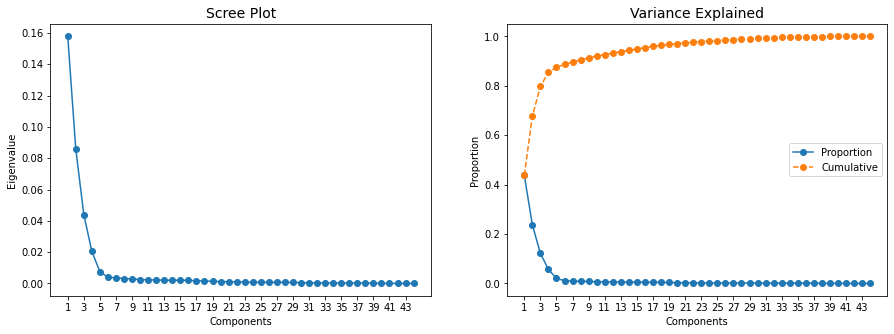

In [49]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

We decided to establish a threshold of 85% cumulative variance, so we will retain the first 5 components

In [50]:
#Retain the first 5 components
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df_behavi)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
#Create the dataframe "df_PCA" with the PC`s and the normalized categorical features
df_PCA = pd.DataFrame(pca_feat, index=df_behavi.index, columns=pca_feat_names)
#Normalize the PC features
metric_features1 = df_PCA.select_dtypes(include=['number']).columns.tolist()
scaled_feat = scaler.fit_transform(df_PCA)
df_PCA = scaled_feat
df_behavi = pd.DataFrame(df_PCA, index=df_behavi.index, columns=metric_features1)

# Outlier removing and clustering using DBSCAN

In psychographic segmentation

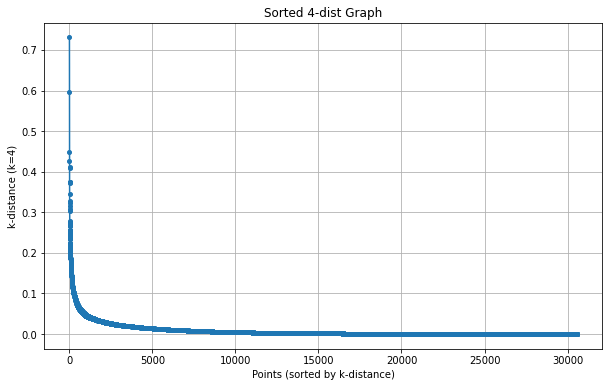

Proposed Eps based on noise percentage (5.0%): 0.036
Suggested Eps: 0.03647135795298726


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


def compute_k_distances(df_psy, k=4):
    """
    Compute the k-distance for each point in the dataset.

    Parameters:
    df_psy (array-like): A 2D array where rows represent points.
    k (int): The k-th nearest neighbor to consider.

    Returns:
    distances (np.array): Sorted distances to the k-th nearest neighbor.
    indices (np.array): Indices of points sorted by their k-distances.
    """
    nbrs = NearestNeighbors(n_neighbors=k).fit(df_psy)
    distances, _ = nbrs.kneighbors(df_psy)

    # k-dist is the distance to the k-th nearest neighbor
    k_distances = distances[:, k - 1]
    sorted_indices = np.argsort(k_distances)[::-1]  # Descending sort
    sorted_k_distances = k_distances[sorted_indices]

    return sorted_k_distances, sorted_indices


def plot_k_dist_graph(k_distances):
    """
    Plot the k-dist graph for visualization.

    Parameters:
    k_distances (np.array): Sorted k-distances.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_distances, marker='o', linestyle='-', markersize=4)
    plt.xlabel("Points (sorted by k-distance)")
    plt.ylabel(f"k-distance (k=4)")
    plt.title("Sorted 4-dist Graph")
    plt.grid(True)
    plt.show()


def estimate_eps_from_k_dist(k_distances, noise_percentage=None):
    """
    Estimate Eps from the sorted k-distances graph based on user input.

    Parameters:
    k_distances (np.array): Sorted k-distances.
    noise_percentage (float): Percentage of noise (0 to 1). Optional.

    Returns:
    eps (float): Suggested Eps value for DBSCAN.
    """
    if noise_percentage is not None:
        threshold_index = int(len(k_distances) * noise_percentage)
        eps = k_distances[threshold_index]
        print(f"Proposed Eps based on noise percentage ({noise_percentage * 100}%): {eps:.3f}")
    else:
        eps = float(input("Enter manually chosen Eps based on the graph: "))

    return eps


# Example usage
if __name__ == "__main__":
    # Example data (2D points)
    df_psy = df_psy

    # Compute 4-distances
    k_distances, sorted_indices = compute_k_distances(df_psy, k=4)

    # Plot k-dist graph
    plot_k_dist_graph(k_distances)

    # Estimate Eps (using a user-provided noise percentage)
    noise_percentage = 0.05  # Example: 5% noise
    eps = estimate_eps_from_k_dist(k_distances, noise_percentage)
    print(f"Suggested Eps: {eps}")


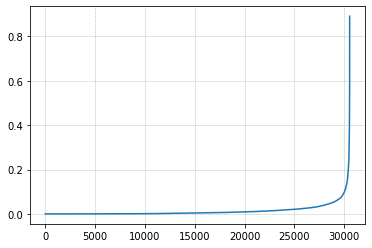

In [52]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_psy)
distances, _ = neigh.kneighbors(df_psy)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [53]:
from sklearn.cluster import DBSCAN
epsilon = 0.037  
min_samples = 10  
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_psy)
df_psy['Cluster'] = clusters
df_psy['Cluster'].value_counts()

Cluster
 0    29046
-1     1500
 1        8
Name: count, dtype: int64

In [53]:
df_psy = df_psy[df_psy['Cluster'] != -1].reset_index(drop=True)
df_psy=df_psy.drop('Cluster',axis=1)

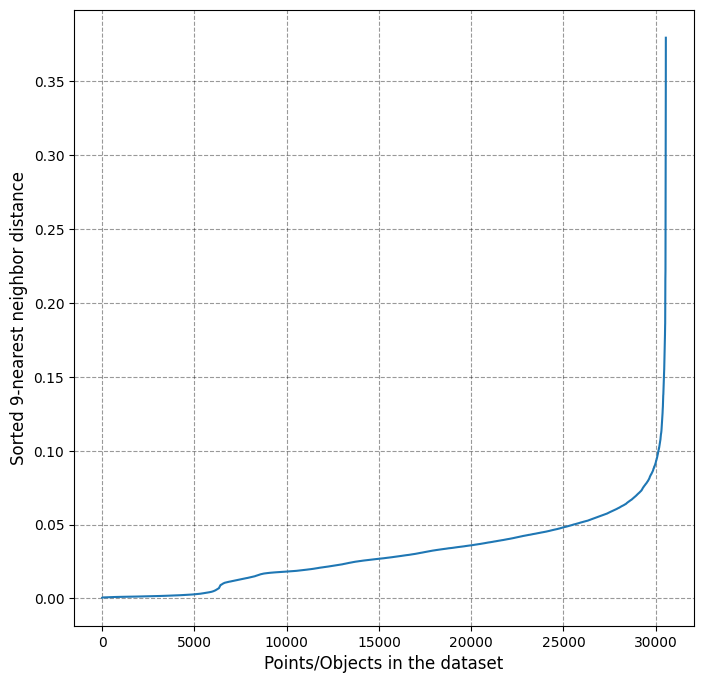

In [54]:
from sklearn.neighbors import NearestNeighbors
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * df_behavi.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=df_behavi, k=k)

In [55]:
from sklearn.cluster import DBSCAN
epsilon = 0.06  
min_samples = 11  
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_behavi)
df_behavi['Cluster'] = clusters
df_behavi['Cluster'].value_counts()

Cluster
 0    28491
-1     1651
 1      247
 8       80
 9       23
 6       12
 7       12
 5       11
 3       11
 4        9
 2        7
Name: count, dtype: int64

In [56]:
df_behavi = df_behavi[df_behavi['Cluster'] != -1].reset_index(drop=True)
df_behavi=df_behavi.drop('Cluster',axis=1)

# Output data

In [57]:
df_behavi.to_csv('df_behaviour.csv')

In [58]:
df_psy.to_csv('df_psy.csv')

In [59]:
df_demo.to_csv('df_demo.csv')